# Recognizing hand-written digits with Random Forests

En este tutorial se utilizará el algoritmo "Random Forests" para reconocer dígitos escritos a mano. El objetivo consiste en identificar un caracter a partir de una imagen digitalizada que se representa como un conjunto de pixeles.

En este caso se usará el dataset de MNIST que se puede obtener en http://yann.lecun.com/exdb/mnist/. Paralelamente se usara el paquete MNIST que se puede instalar desde la consola usando el comando:

_pip install python-mnist_

In [1]:
# Inicialmente importamos las librerias que se utilizaran

import numpy as np
from random import *
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from mnist import MNIST

In [2]:
# Cargamos la data en el objeto mndata:
mndata = MNIST('./MNIST_data')

trainingImages, trainingLabels = mndata.load_training()
testImages, testLabels = mndata.load_testing()

# Each image of the images list is an Python list of unsigned bytes.
# The labels is an Python array of unsigned bytes.

In [3]:
# Dividimos la data en training y testing data

trainingImagesCount = len(trainingImages)
testingImagesCount = len(testImages)

print ("Total Training count:",(trainingImagesCount))
print ("Final Testing count:",(testingImagesCount))

# Dividimos el dataset en:
#  -Datos de Entremamiento 70%  (features, labels)
#  -Datos de Testing  30%   (features y labels)

train_data, test_data, train_labels, test_labels = train_test_split(trainingImages, trainingLabels, test_size=0.3, random_state=42)

trainDataCount = len(train_data)
testDataCount = len(test_data)
print ("Training count 70%:",(trainDataCount))
print ("Testing count 30%:",(testDataCount))

('Total Training count:', 60000)
('Final Testing count:', 10000)
('Training count 70%:', 42000)
('Testing count 30%:', 18000)


In [4]:
# Entrenamos el clasificador


clf = RandomForestClassifier(n_estimators=15, criterion="gini", max_depth=32, max_features="auto")
clf = clf.fit(train_data, train_labels)

# Look at parameters used by our current forest
print('Parametros usados:\n')
print(clf.get_params())

Parametros usados:

{'warm_start': False, 'oob_score': False, 'n_jobs': 1, 'verbose': 0, 'max_leaf_nodes': None, 'bootstrap': True, 'min_samples_leaf': 1, 'n_estimators': 15, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'criterion': 'gini', 'random_state': None, 'min_impurity_split': 1e-07, 'max_features': 'auto', 'max_depth': 32, 'class_weight': None}


Hiperparametros
- n_estimators : number of trees in the foreset
- criterion : The function to measure the quality of a split. Default "gini"
- max_depth : max number of levels in each decision tree
- max_features : max number of features considered for splitting a node

Más info: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [5]:
# Aplicamos el clasificador en el testing data
predictionRes = clf.predict(test_data)

In [21]:
# Accuracy andConfusion matrix 

print ("Train Accuracy : ", accuracy_score(train_labels, clf.predict(train_data)))
print ("Test Accuracy  : ", accuracy_score(test_labels, predictionRes))
print ("Confusion matrix \n", confusion_matrix(test_labels, predictionRes))

Train Accuracy :  0.99980952381
Test Accuracy  :  0.9515
Confusion matrix 
 [[1770    2    2    3    4    8    8    1    5    2]
 [   0 1967   12    5    4    0    0    2    1    3]
 [   6    8 1686    8    9    2    7   20    8    5]
 [   5    2   37 1705    3   34    3   23   23   11]
 [   4    2    3    2 1668    2    7    8    3   27]
 [  14    5    7   51    5 1531   14    3   17    6]
 [   8    1    5    1    9   14 1745    0    4    0]
 [   2   11   32    6    7    1    0 1849   10   19]
 [   5   17   26   33   16   28   11    4 1577   13]
 [  10    4    9   20   32   16    2   25   16 1629]]


In [6]:
# Se puede obtener un reporte de la precision, recall y f1 score para cada clase

print (metrics.classification_report(test_labels, predictionRes, digits=4))

             precision    recall  f1-score   support

          0     0.9752    0.9812    0.9782      1805
          1     0.9746    0.9829    0.9788      1994
          2     0.9250    0.9602    0.9423      1759
          3     0.9452    0.9242    0.9345      1846
          4     0.9437    0.9623    0.9530      1726
          5     0.9375    0.9341    0.9358      1653
          6     0.9700    0.9759    0.9729      1787
          7     0.9577    0.9463    0.9520      1937
          8     0.9449    0.9214    0.9330      1730
          9     0.9389    0.9246    0.9317      1763

avg / total     0.9518    0.9518    0.9517     18000



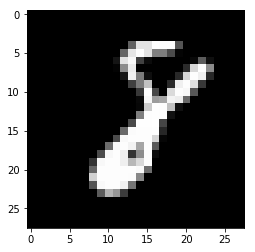

In [7]:
rt = testImages[randint(1, testingImagesCount-1)]
rt = np.array(rt, dtype='float')
pixels = rt.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [8]:
print(clf.predict( [rt]))

[2]
